In [1]:
%matplotlib inline

from pathlib import Path
import random

import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import power

import matplotlib.pylab as plt

In [4]:
WEB_PAGE_DATA_CSV = '../../data/web_page_data.csv'
session_times = pd.read_csv(WEB_PAGE_DATA_CSV)
session_times.Time = 100 * session_times.Time

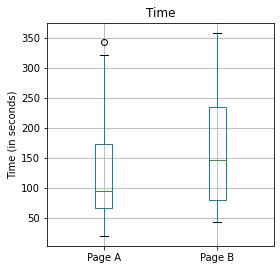

In [5]:
ax = session_times.boxplot(by='Page', column='Time',
                           figsize=(4, 4))
ax.set_xlabel('')
ax.set_ylabel('Time (in seconds)')
plt.suptitle('')

plt.tight_layout()
plt.show()

In [12]:
session_times

,Page,Time
0,Page A,21.0
1,Page B,253.0
2,Page A,35.0
3,Page B,71.0
4,Page A,67.0
5,Page B,85.0
6,Page A,211.0
7,Page B,246.0
8,Page A,132.0
9,Page B,149.0


In [11]:
mean_a = session_times[session_times.Page=='Page A'].Time.mean()
mean_b = session_times[session_times.Page=='Page B'].Time.mean()
print(mean_b - mean_a)

35.66666666666667


In [14]:
set(random.sample(range(100), 10))

{2, 7, 14, 46, 48, 57, 80, 83, 89, 90}

In [15]:
def perm(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B
    return x.loc[list(idx_B)].mean() - x.loc[list(idx_A)].mean()

In [21]:
nA = session_times[session_times.Page=='Page A'].shape[0]
nB = session_times[session_times.Page=='Page B'].shape[0]
x = session_times.Time

perm(x, nA, nB)

8.009523809523813

In [24]:
random.seed(1)
perm_diffs = [perm(x, nA, nB) for _ in range(1000)]

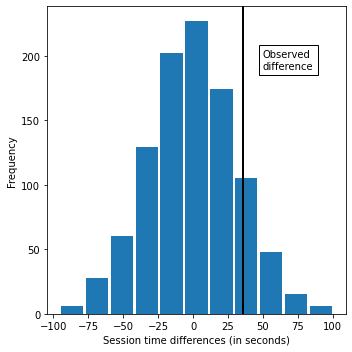

In [25]:
fig, ax = plt.subplots(figsize=(5, 5))

ax.hist(perm_diffs, bins=11, rwidth=0.9)

ax.axvline(x = mean_b - mean_a, color='black', lw=2)
ax.text(50, 190, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Session time differences (in seconds)')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [31]:
perm_diffs = np.array(perm_diffs)
diff_observed = mean_b-mean_a

aka_p_value = np.mean(perm_diffs > diff_observed)

print(aka_p_value*100,'%', 'вероятность получить 35.66 или больше')

12.1 %


In [39]:
res = stats.ttest_ind(session_times[session_times.Page == 'Page B'].Time, 
                session_times[session_times.Page == 'Page A'].Time, equal_var=False)

100*res.pvalue / 2       

14.076218622850305

In [40]:
four_sessions = pd.read_csv('../../data/four_sessions.csv')
four_sessions

,Page,Time
0,Page 1,164
1,Page 2,178
2,Page 3,175
3,Page 4,155
4,Page 1,172
5,Page 2,191
6,Page 3,193
7,Page 4,166
8,Page 1,177
9,Page 2,182


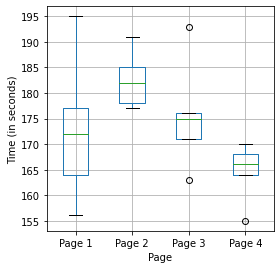

In [41]:
ax = four_sessions.boxplot(by='Page', column='Time',
                           figsize=(4, 4))
ax.set_xlabel('Page')
ax.set_ylabel('Time (in seconds)')
plt.suptitle('')
plt.title('')

plt.tight_layout()
plt.show()

In [46]:
stats.f_oneway(four_sessions[four_sessions.Page == 'Page 1'].Time,
               four_sessions[four_sessions.Page == 'Page 2'].Time,
               four_sessions[four_sessions.Page == 'Page 3'].Time,
               four_sessions[four_sessions.Page == 'Page 4'].Time)

F_onewayResult(statistic=2.739825341901467, pvalue=0.0775862152580146)

In [ ]:
# Задание: выполнить permutation test для four_sessions и посчитать p-value
# Hint: использовать np.random.permutation()
def perm_test(df):
    ...
    
    
    
random.seed(1)
perm_variance = [perm_test(four_sessions) for _ in range(3000)]

...
# построить гистограмму

# построить гистограмму
# p-value
print('Pr(Prob)', np.mean([var > observed_variance for var in perm_variance]))

In [48]:
observed_variance = four_sessions.groupby('Page').mean().var()[0]
observed_variance

55.426666666666655

In [ ]:
def perm_test(df):
    ...

In [ ]:
random.seed(1)
perm_variance = [perm_test(four_sessions) for _ in range(3000)]

...
# построить гистограмму

In [ ]:
# p-value
print('Pr(Prob)', np.mean([var > observed_variance for var in perm_variance]))

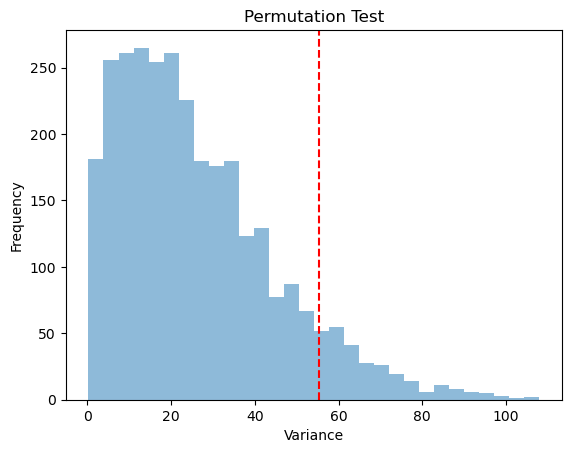

Pr(Prob) 0.08533333333333333


In [4]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

df = pd.read_csv('four_sessions.csv')

def perm_test(df):
    observed_variance = df.groupby('Page')['Time'].mean().var()
    shuffled_variance = []
    for _ in range(3000):
        shuffled_df = df.copy()
        shuffled_df['Page'] = np.random.permutation(shuffled_df['Page'].values)
        shuffled_variance.append(shuffled_df.groupby('Page')['Time'].mean().var())
    return observed_variance, shuffled_variance

random.seed(1)
observed_variance, perm_variance = perm_test(df)

plt.hist(perm_variance, bins=30, alpha=0.5)
plt.axvline(x=observed_variance, color='red', linestyle='--')
plt.xlabel('Variance')
plt.ylabel('Frequency')
plt.title('Permutation Test')
plt.show()

# p-value
p_value = np.mean([var > observed_variance for var in perm_variance])
print('Pr(Prob)', p_value)

